"""<br>
@Author: Prayag Bhoir<br>
@Date: 03-10-2024<br>
@Last Modified by: Prayag Bhoir<br>
@Last Modified time: 03-10-2024<br>
@Title : Python programs to Build a predictive linear regression model for given dataset, given humidity 
predict apparent temperature <br>
"""

In [123]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import matplotlib.pylab as plt

<h2>Load the Dataset </h2>

In [124]:
df = pd.read_csv('weatherHistory.csv')
#check the data
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [125]:
# Filtered the data as we want
df_filtered = df[['Humidity','Apparent Temperature (C)']]
#check the data
df_filtered.head()


,Humidity,Apparent Temperature (C)
0,0.89,7.388889
1,0.86,7.227778
2,0.89,9.377778
3,0.83,5.944444
4,0.83,6.977778


In [126]:
df_filtered.shape

(96453, 2)

<h2>Check the outliers (Explore data)</h2>

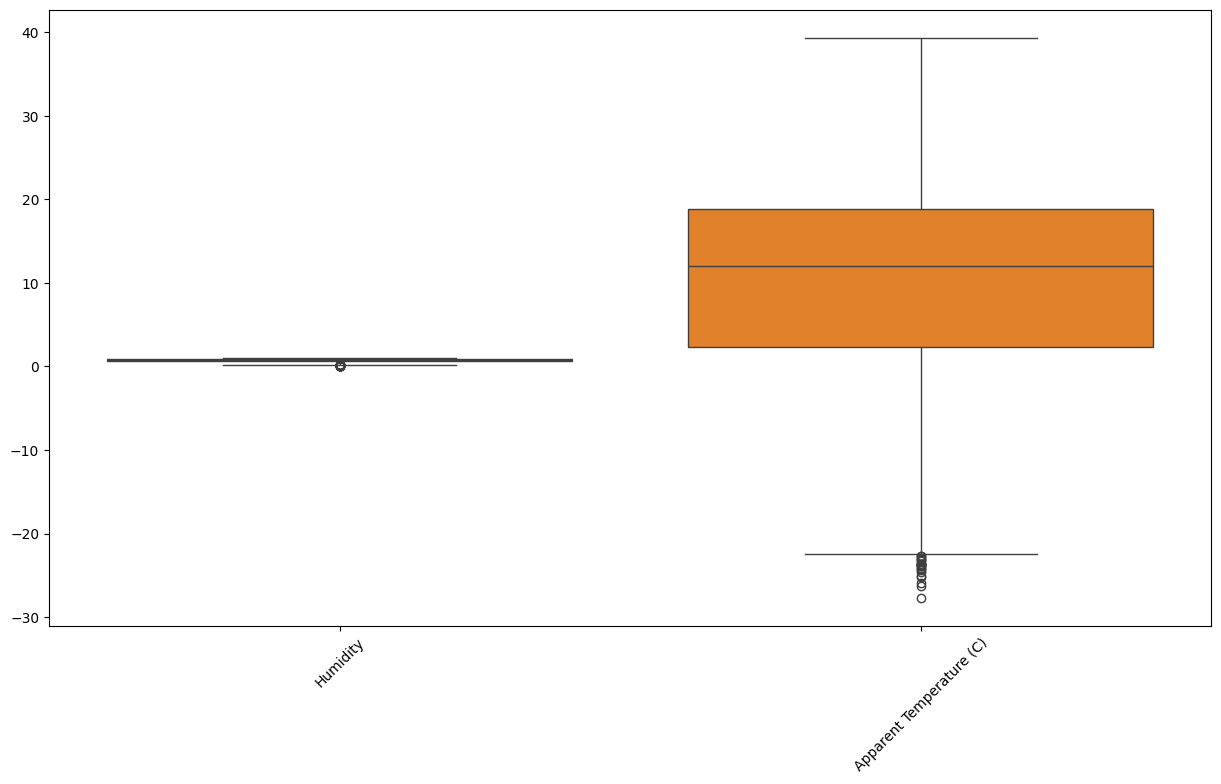

In [127]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_filtered)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Observations</h2>
<li>There are outliers present in the features</li>

<h2>Preprocess the data</h2>

In [128]:
# Check for missing values in training and testing data
print("Missing values in data:")
print(df_filtered.isnull().sum())

Missing values in data:
Humidity                    0
Apparent Temperature (C)    0
dtype: int64


In [129]:
# Remove the outliers
def remove_outliers_iqr(dataframe):
    """
    Description:
      This function removes the outliers using IQR

    Parameters:
      dataframe(pd.df): The dataframe to clean

    Returns:
      dataframe(pd.df): The dataframe after cleaning
    """
    # Define numerical columns to consider for outlier removal
    numerical_cols = dataframe.describe().columns
    
    for col in numerical_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter the DataFrame to remove outliers
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    
    return dataframe

# Remove outliers from the DataFrame
df_cleaned = remove_outliers_iqr(df_filtered)

In [130]:
# Run multiple times to further remove the outliers, but it can lead to data loss if you run to much times.
df_cleaned = remove_outliers_iqr(df_cleaned)

In [131]:
df_cleaned.shape

(96389, 2)

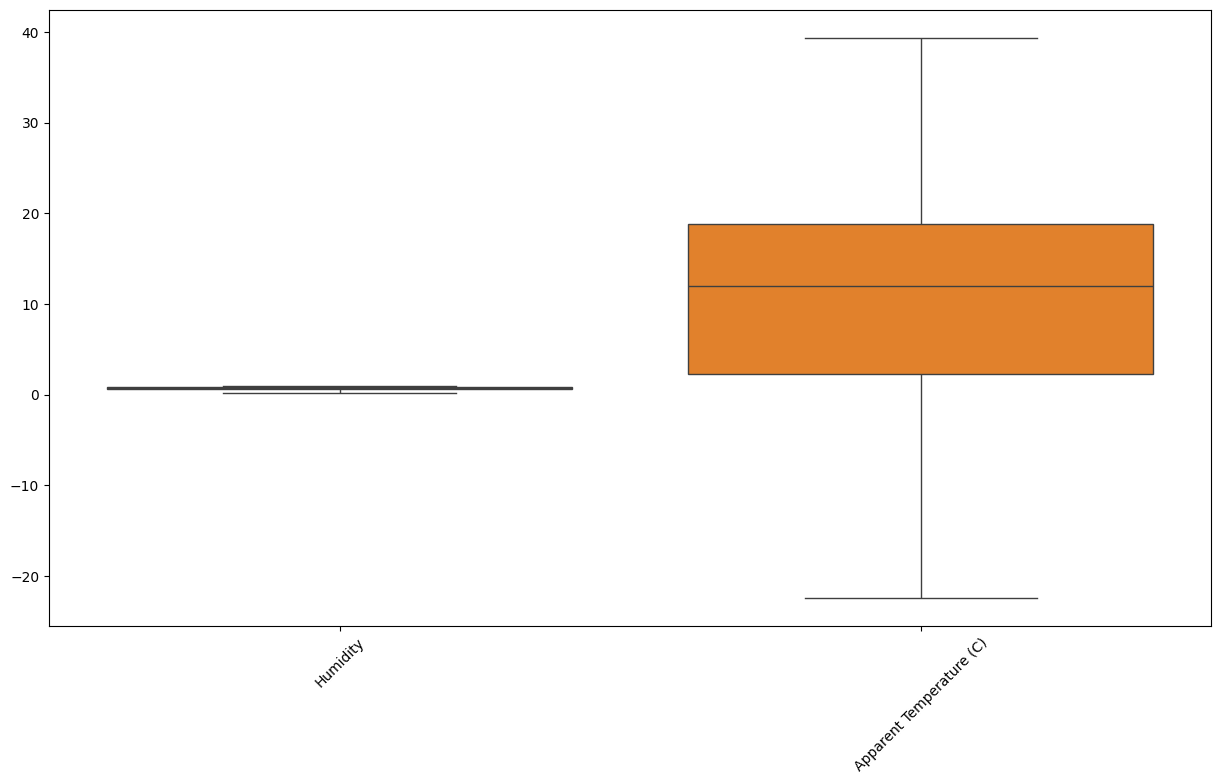

In [132]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_cleaned)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

<h2>Saperate the features</h2>

In [133]:
X = df_cleaned[['Humidity']]
y = df_cleaned[['Apparent Temperature (C)']]
#Check the data
X.head(),y.head()

(   Humidity
 0      0.89
 1      0.86
 2      0.89
 3      0.83
 4      0.83,
    Apparent Temperature (C)
 0                  7.388889
 1                  7.227778
 2                  9.377778
 3                  5.944444
 4                  6.977778)

<h2>Split the dataset into training and testing</h2>


In [134]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
display(X_test)
display(y_test)

,Humidity
89960,0.66
49352,0.56
93835,0.77
93045,0.85
50354,0.96
...,...
85234,0.59
88459,0.90
91609,0.93
31562,0.89


,Apparent Temperature (C)
89960,5.516667
49352,11.088889
93835,12.833333
93045,-2.055556
50354,3.750000
...,...
85234,15.133333
88459,14.861111
91609,15.494444
31562,0.000000


<h2>Build the model</h2>

In [136]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<h2>Make prediction on test data.</h2>

In [151]:
y_pred = model.predict(X_test)

<h2>Evaluating the model</h2>

In [138]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [150]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 72.06911000865394
R-squared: 0.367405596865236


<h2>Visualize the model</h2>

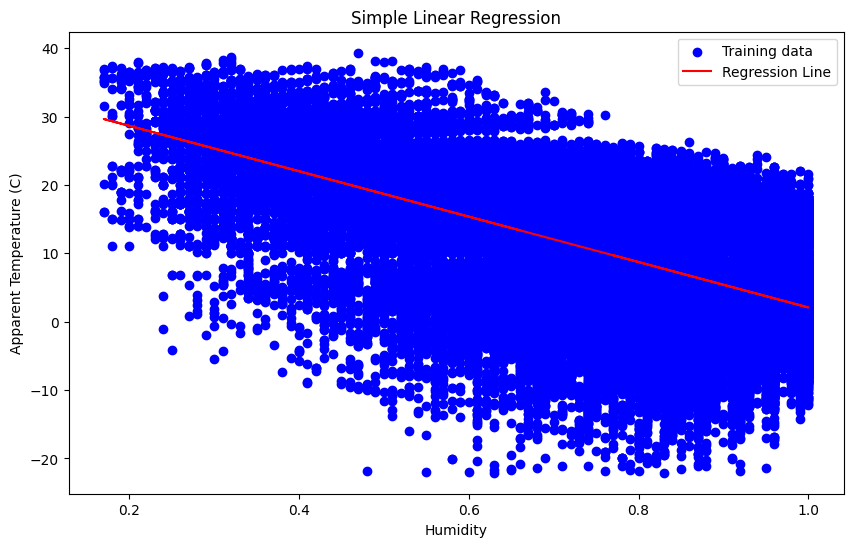

In [157]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()